<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/VizStateSpaceCartPole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

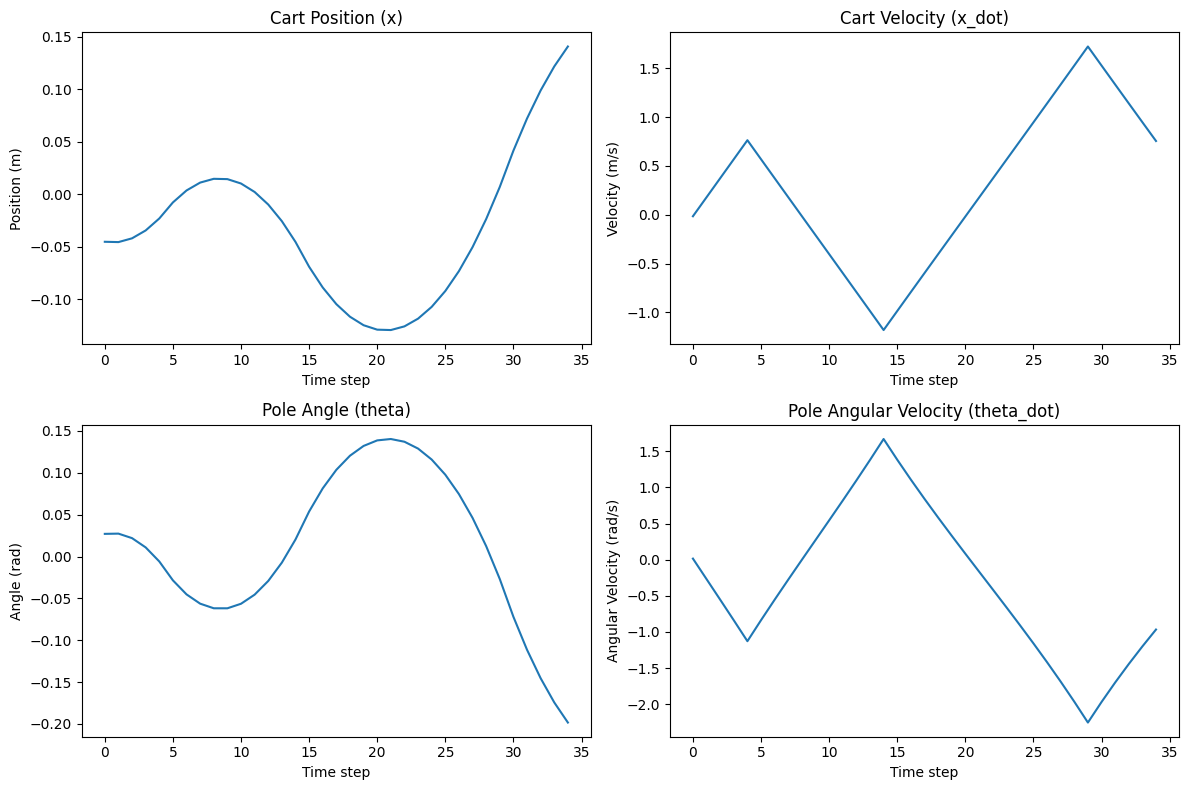

In [1]:
# Install gymnasium (modern Gym version)
!pip install gymnasium[classic-control] matplotlib --quiet

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

# Create the environment
env = gym.make("CartPole-v1", render_mode=None)
obs, _ = env.reset()

# Lists to store state evolution
x_vals = []
x_dot_vals = []
theta_vals = []
theta_dot_vals = []

# Run simulation for a fixed number of steps
steps = 200
for _ in range(steps):
    # Append current state
    x, x_dot, theta, theta_dot = obs
    x_vals.append(x)
    x_dot_vals.append(x_dot)
    theta_vals.append(theta)
    theta_dot_vals.append(theta_dot)

    # Apply a simple heuristic: push right if pole is leaning right, else left
    action = 1 if theta > 0 else 0

    obs, _, terminated, truncated, _ = env.step(action)
    if terminated or truncated:
        break

env.close()

# Plotting
time = np.arange(len(x_vals))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time, x_vals)
plt.title('Cart Position (x)')
plt.xlabel('Time step')
plt.ylabel('Position (m)')

plt.subplot(2, 2, 2)
plt.plot(time, x_dot_vals)
plt.title('Cart Velocity (x_dot)')
plt.xlabel('Time step')
plt.ylabel('Velocity (m/s)')

plt.subplot(2, 2, 3)
plt.plot(time, theta_vals)
plt.title('Pole Angle (theta)')
plt.xlabel('Time step')
plt.ylabel('Angle (rad)')

plt.subplot(2, 2, 4)
plt.plot(time, theta_dot_vals)
plt.title('Pole Angular Velocity (theta_dot)')
plt.xlabel('Time step')
plt.ylabel('Angular Velocity (rad/s)')

plt.tight_layout()
plt.show()
